In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scikit_posthocs as sp
import numpy as np
from scipy import stats
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
# Load Dataset
data = pd.read_csv('/Users/hankeigei/Desktop/Master/analytics software/as2 climate project/RegionalData.csv')

/var/folders/5_/y8fcfhns6pg08nc1hx95cxbc0000gn/T/ipykernel_8029/3386180809.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


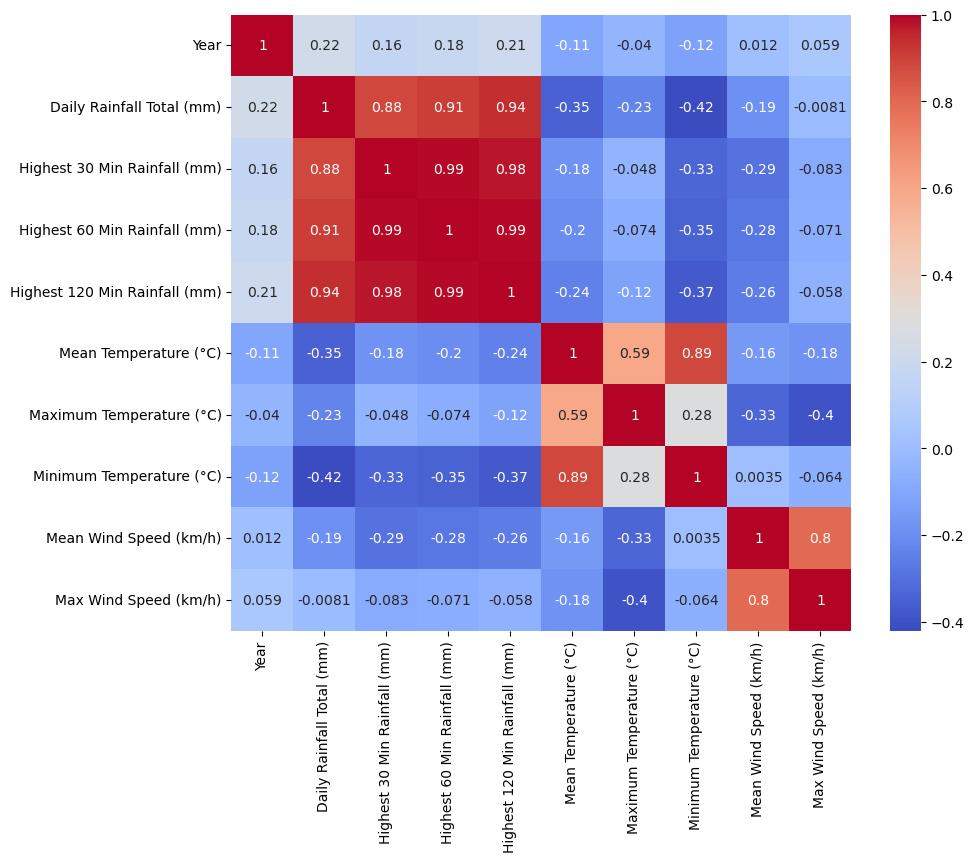

In [3]:
# Calculate Correlation Matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

/var/folders/5_/y8fcfhns6pg08nc1hx95cxbc0000gn/T/ipykernel_8029/442964964.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_data = data.groupby(data['Year'].dt.year).mean()


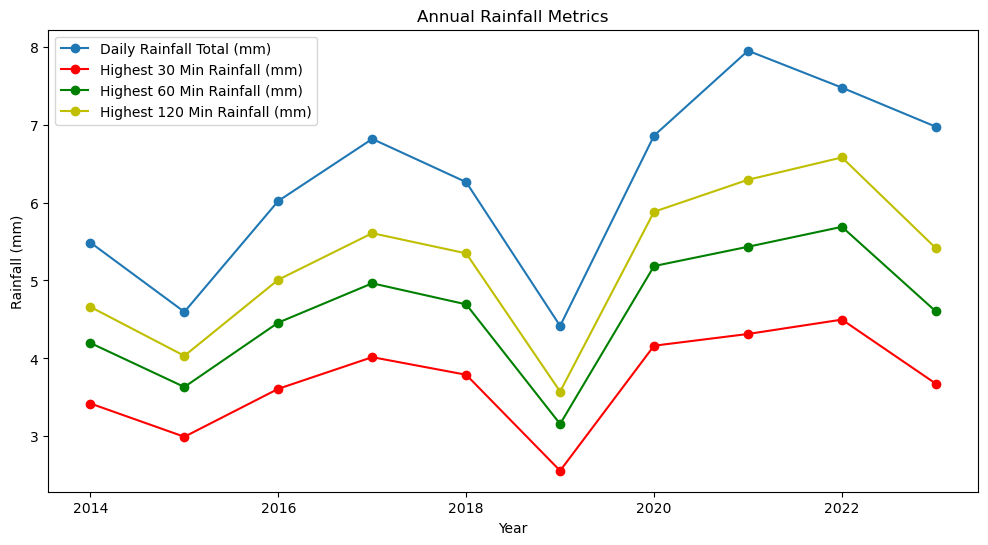

In [4]:
# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Calculate the annual average of Rainfall, Temperature, and Wind speed
annual_data = data.groupby(data['Year'].dt.year).mean()

# Plotting the annual Rainfall for different metrics
plt.figure(figsize=(12, 6))

# Plot each rainfall metric with a different color and label
plt.plot(annual_data.index, annual_data['Daily Rainfall Total (mm)'], marker='o', linestyle='-', label='Daily Rainfall Total (mm)')
plt.plot(annual_data.index, annual_data['Highest 30 Min Rainfall (mm)'], marker='o', color='r', linestyle='-', label='Highest 30 Min Rainfall (mm)')
plt.plot(annual_data.index, annual_data['Highest 60 Min Rainfall (mm)'], marker='o', color='g', linestyle='-', label='Highest 60 Min Rainfall (mm)')
plt.plot(annual_data.index, annual_data['Highest 120 Min Rainfall (mm)'], marker='o', color='y', linestyle='-', label='Highest 120 Min Rainfall (mm)')

# Title and labels
plt.title('Annual Rainfall Metrics')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')

# Legend
plt.legend()

# Show plot
plt.show()

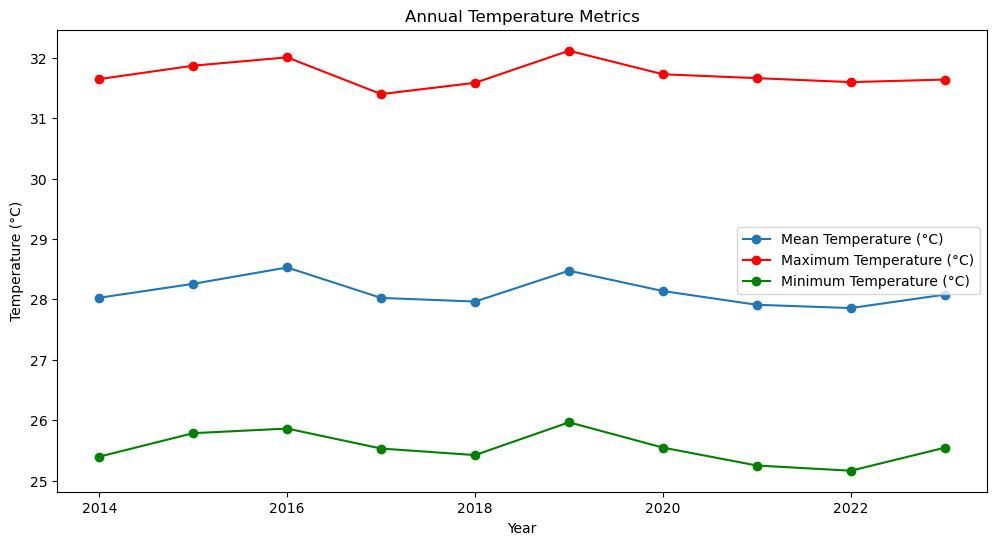

In [5]:
# Plotting the annual Temperature for different metrics
plt.figure(figsize=(12, 6))

# Plot each Temperature metric with a different color and label
plt.plot(annual_data.index, annual_data['Mean Temperature (°C)'], marker='o', linestyle='-', label='Mean Temperature (°C)')
plt.plot(annual_data.index, annual_data['Maximum Temperature (°C)'], marker='o', color='r', linestyle='-', label='Maximum Temperature (°C)')
plt.plot(annual_data.index, annual_data['Minimum Temperature (°C)'], marker='o', color='g', linestyle='-', label='Minimum Temperature (°C)')

# Title and labels
plt.title('Annual Temperature Metrics')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')

# Legend
plt.legend()

# Show plot
plt.show()

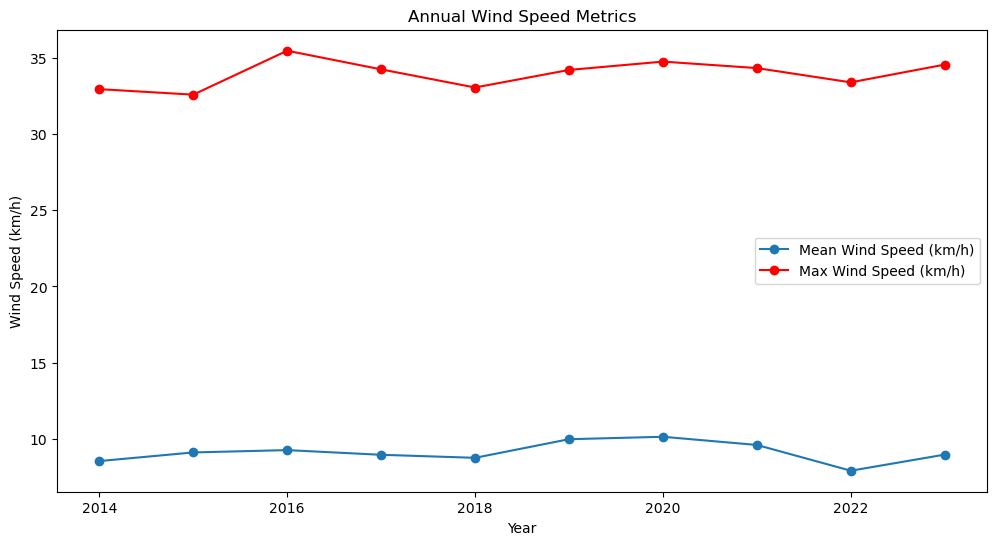

In [6]:
# Plotting the annual Wind Speed for different metrics
plt.figure(figsize=(12, 6))

# Plot each Temperature metric with a different color and label
plt.plot(annual_data.index, annual_data['Mean Wind Speed (km/h)'], marker='o', linestyle='-', label='Mean Wind Speed (km/h)')
plt.plot(annual_data.index, annual_data['Max Wind Speed (km/h)'], marker='o', color='r', linestyle='-', label='Max Wind Speed (km/h)')

# Title and labels
plt.title('Annual Wind Speed Metrics')
plt.ylabel('Wind Speed (km/h)')
plt.xlabel('Year')

# Legend
plt.legend()

# Show plot
plt.show()

/var/folders/5_/y8fcfhns6pg08nc1hx95cxbc0000gn/T/ipykernel_8029/3586530674.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average = data.groupby('Month').mean().reset_index()


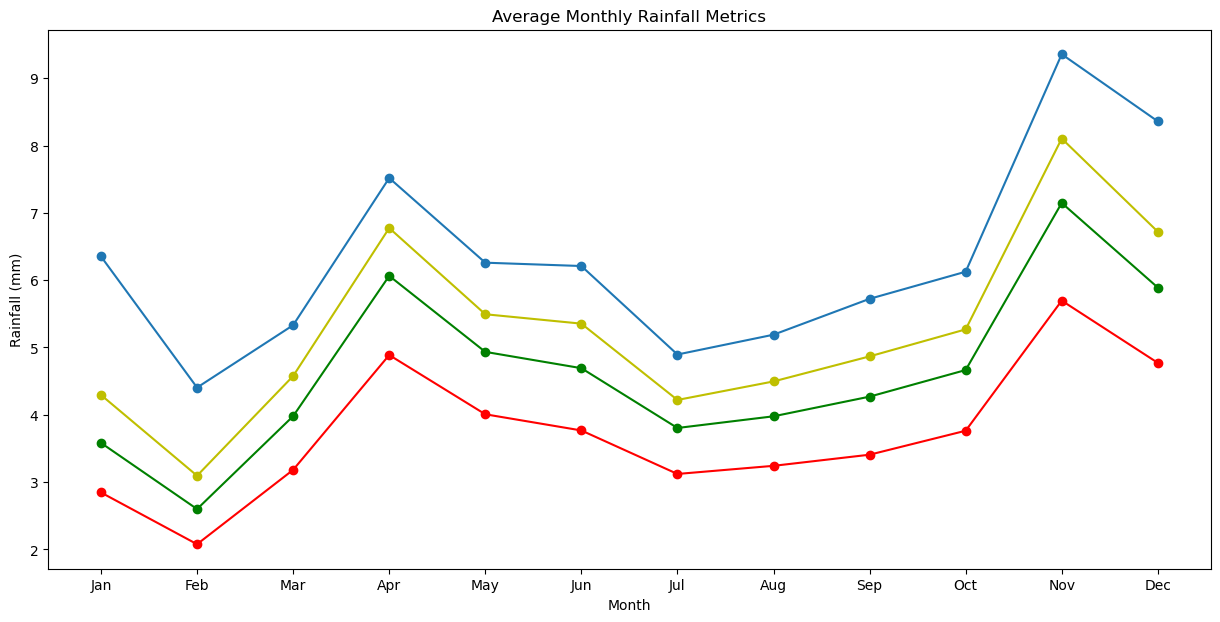

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


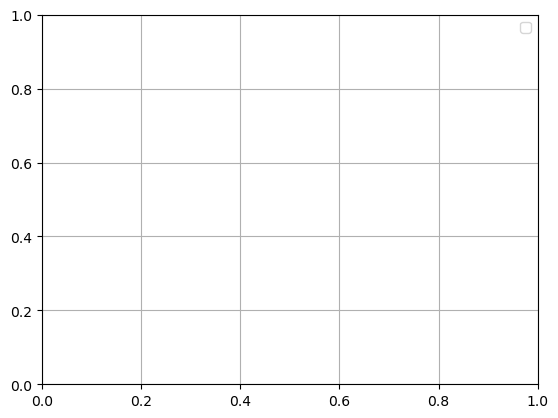

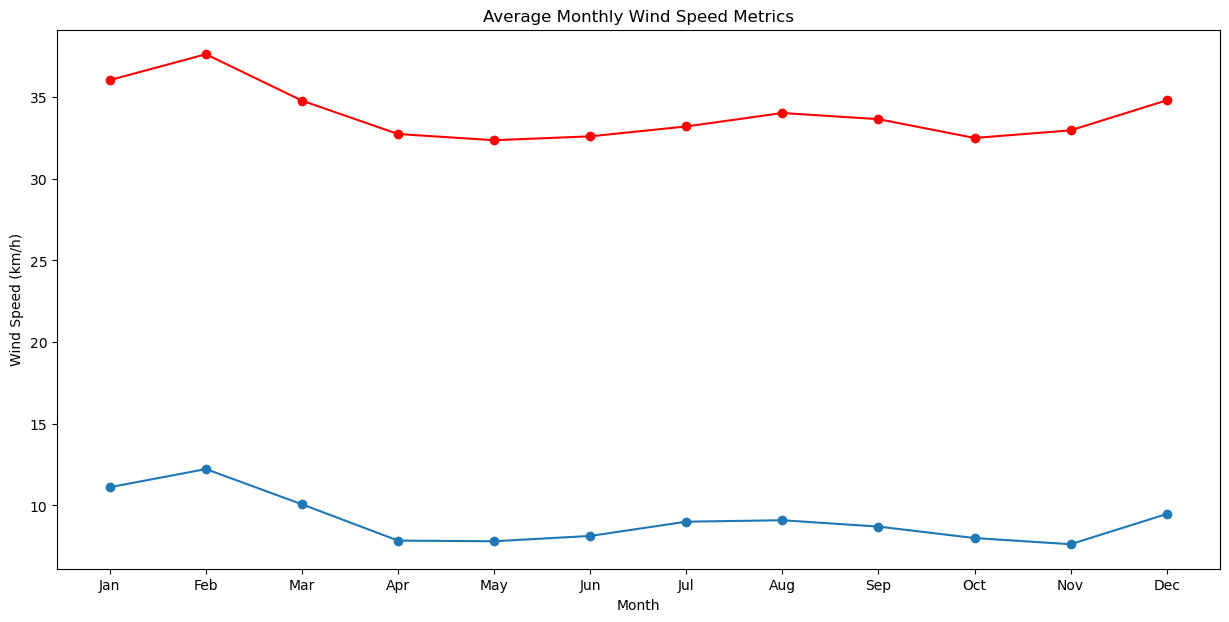

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


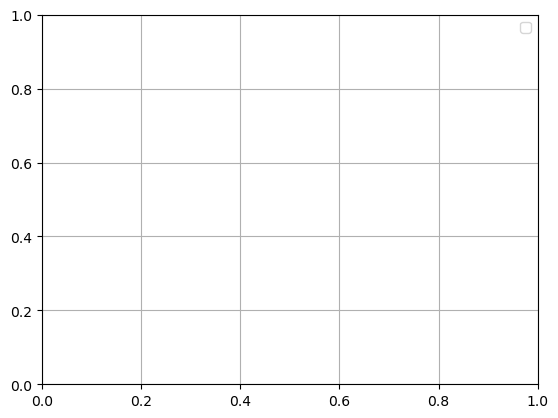

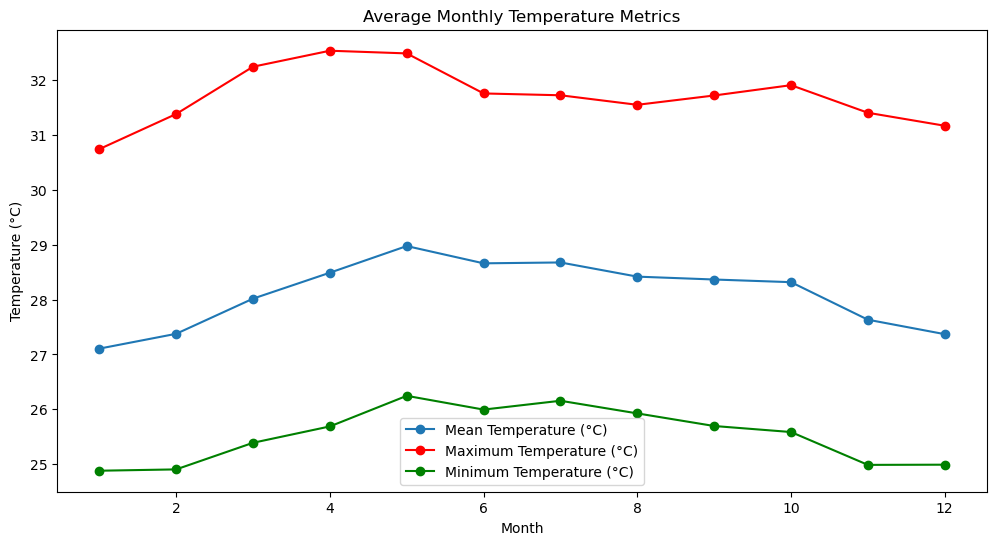

In [7]:
# Month to number
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Convert month variable to numeric
data['Month'] = data['Month'].map(month_to_number)

# Calculate month average
monthly_average = data.groupby('Month').mean().reset_index()

# plot
plt.figure(figsize=(15, 7))

# Plot each rainfall metric with a different color and label
plt.plot(monthly_average['Month'], monthly_average['Daily Rainfall Total (mm)'], marker='o', linestyle='-', label='Daily Rainfall Total (mm)')
plt.plot(monthly_average['Month'], monthly_average['Highest 30 Min Rainfall (mm)'], marker='o', color='r', linestyle='-', label='Highest 30 Min Rainfall (mm)')
plt.plot(monthly_average['Month'], monthly_average['Highest 60 Min Rainfall (mm)'], marker='o', color='g', linestyle='-', label='Highest 60 Min Rainfall (mm)')
plt.plot(monthly_average['Month'], monthly_average['Highest 120 Min Rainfall (mm)'], marker='o', color='y', linestyle='-', label='Highest 120 Min Rainfall (mm)')

# Show plot
plt.title('Average Monthly Rainfall Metrics')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set the x-axis markers to month abbreviations
plt.show()
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 7))
# Plot each Temperature metric with a different color and label
plt.plot(monthly_average['Month'], monthly_average['Mean Wind Speed (km/h)'], marker='o', linestyle='-', label='Mean Wind Speed (km/h)')
plt.plot(monthly_average['Month'], monthly_average['Max Wind Speed (km/h)'], marker='o', color='r', linestyle='-', label='Max Wind Speed (km/h)')

# Show plot
plt.title('Average Monthly Wind Speed Metrics')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set the x-axis markers to month abbreviations
plt.show()
plt.legend() 
plt.grid(True)
plt.show()

# Plotting the annual Temperature for different metrics
plt.figure(figsize=(12, 6))

# Plot each Temperature metric with a different color and label
plt.plot(monthly_average['Month'], monthly_average['Mean Temperature (°C)'], marker='o', linestyle='-', label='Mean Temperature (°C)')
plt.plot(monthly_average['Month'], monthly_average['Maximum Temperature (°C)'], marker='o', color='r', linestyle='-', label='Maximum Temperature (°C)')
plt.plot(monthly_average['Month'], monthly_average['Minimum Temperature (°C)'], marker='o', color='g', linestyle='-', label='Minimum Temperature (°C)')

# Title and labels
plt.title('Average Monthly Temperature Metrics')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')

# Legend
plt.legend()

# Show plot
plt.show()

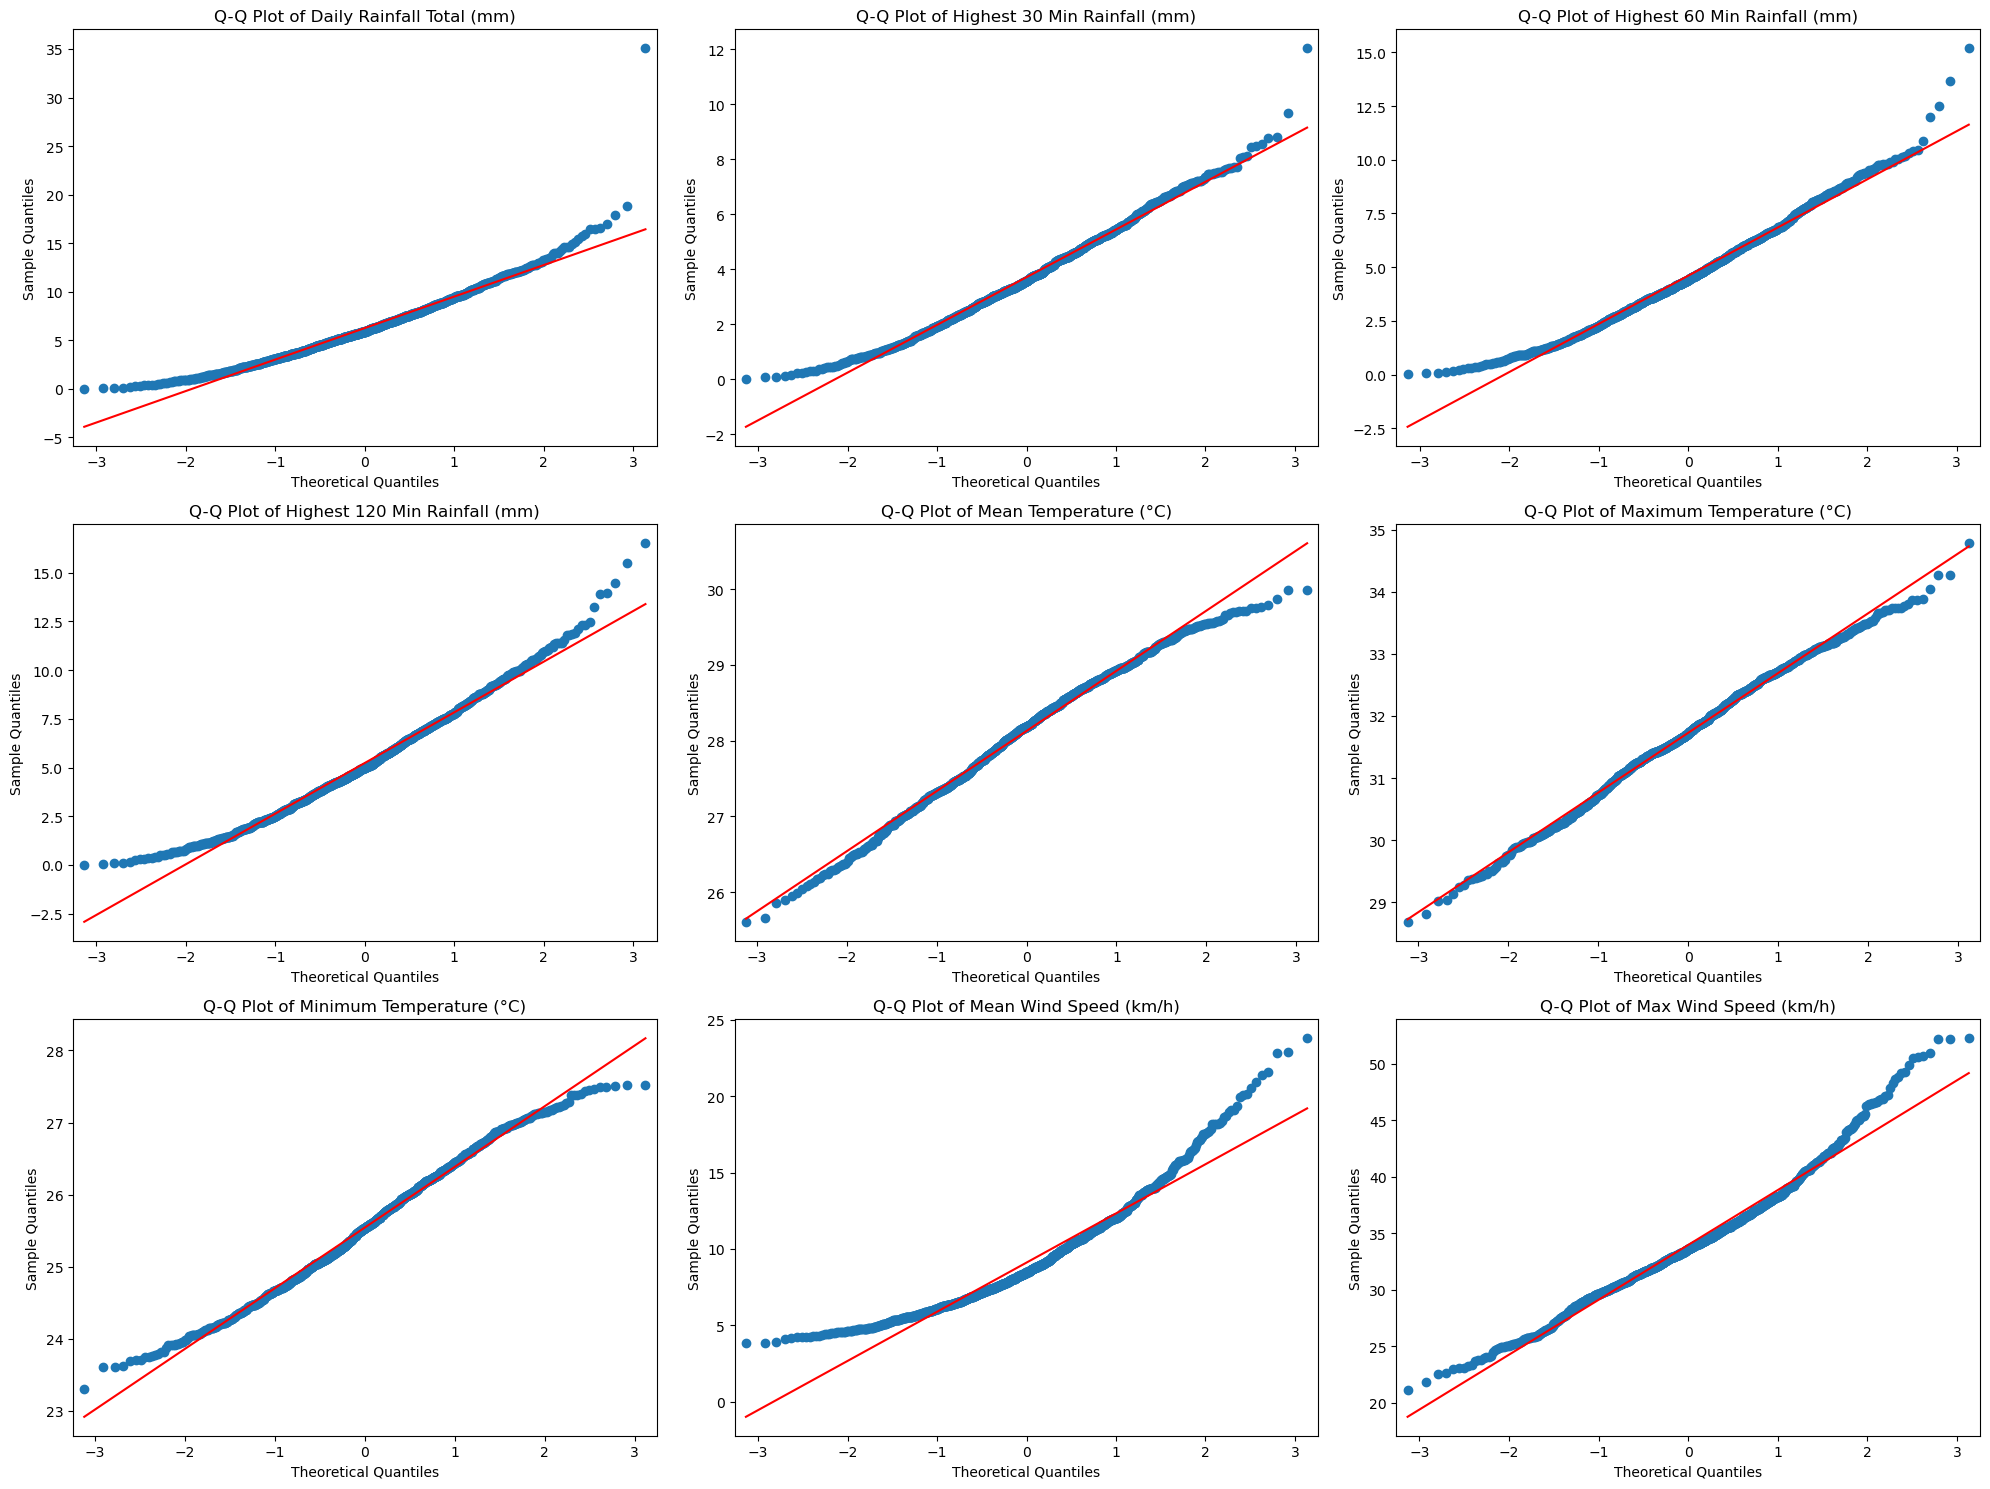

In [8]:
#qqplot
variables = [
    'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 
    'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)',
    'Mean Temperature (°C)', 'Maximum Temperature (°C)',
    'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 
    'Max Wind Speed (km/h)'
]

# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Create a figure and a set of subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust the figsize to fit your needs

# Loop through the variables and subplots
for i, var in enumerate(variables):
    # Compute the position in the grid
    row = i // cols
    col = i % cols
    sm.qqplot(data[var].dropna(), line='s', ax=axs[row, col])  # Draw the Q-Q plot
    axs[row, col].set_title(f'Q-Q Plot of {var}')  # Set title for each subplot

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()